# 디지털 신호 처리 5주차 과제
## 201710758 휴먼지능정보공학과 김진성

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('../thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# from thinkdsp import decorate

In [5]:
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

PI2 = 2 * np.pi

class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

# Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then use it to make a wave with duration 1 s and framerate 20 kHz.

In [13]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)

## 제가 생각하기에는, 2500~3000부분이 튀어나오고, 다른 부분은 꾸불꾸불한 길 일 것 같습니다!

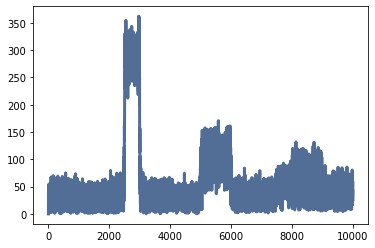

In [14]:
wave.make_spectrum().plot()

## 제 생각에 추가로, 5000 - 6000부분, 7500 - 9000부분에서 sweep현상이 추가로 일어났습니다.